In [1]:
import pandas as pd
import seaborn as sns

#Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

A cryptocurrency is a digital or virtual currency that is secured by cryptography, which makes it nearly impossible to counterfeit or double-spend. We look at some data related to a few of them.

In [2]:
#2018 data
#reading the data

data= pd.read_csv("coinmarketcap_06012018.csv")

In [3]:
data.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,22081300000,16785225,bitcoin,1515230661,284909052105,2.100000e+07,Bitcoin,-0.42,5.76,26.04,1.000000,16973.800000,1,BTC,16785225
1,1,5221370000,38739144847,ripple,1515230641,119207709132,1.000000e+11,Ripple,-0.26,-9.23,24.15,0.000186,3.077190,2,XRP,99993093880
2,2,5705690000,96803840,ethereum,1515230649,100115499075,NaN,Ethereum,0.29,-1.04,45.01,0.062517,1034.210000,3,ETH,96803840
3,3,1569900000,16896225,bitcoin-cash,1515230652,44424061657,2.100000e+07,Bitcoin Cash,0.03,7.99,2.81,0.158934,2629.230000,4,BCH,16896225
4,4,428305000,25927070538,cardano,1515230654,25916647856,4.500000e+10,Cardano,0.39,-5.87,64.99,0.000060,0.999598,5,ADA,31112483745


In [4]:
#dropping the not necessary column

data=data.drop(['Unnamed: 0'], axis = 1) 

In [5]:
data.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,22081300000,16785225,bitcoin,1515230661,284909052105,2.100000e+07,Bitcoin,-0.42,5.76,26.04,1.000000,16973.800000,1,BTC,16785225
1,5221370000,38739144847,ripple,1515230641,119207709132,1.000000e+11,Ripple,-0.26,-9.23,24.15,0.000186,3.077190,2,XRP,99993093880
2,5705690000,96803840,ethereum,1515230649,100115499075,NaN,Ethereum,0.29,-1.04,45.01,0.062517,1034.210000,3,ETH,96803840
3,1569900000,16896225,bitcoin-cash,1515230652,44424061657,2.100000e+07,Bitcoin Cash,0.03,7.99,2.81,0.158934,2629.230000,4,BCH,16896225
4,428305000,25927070538,cardano,1515230654,25916647856,4.500000e+10,Cardano,0.39,-5.87,64.99,0.000060,0.999598,5,ADA,31112483745


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
24h_volume_usd        100 non-null int64
available_supply      100 non-null int64
id                    100 non-null object
last_updated          100 non-null int64
market_cap_usd        100 non-null int64
max_supply            27 non-null float64
name                  100 non-null object
percent_change_1h     100 non-null float64
percent_change_24h    100 non-null float64
percent_change_7d     100 non-null float64
price_btc             100 non-null float64
price_usd             100 non-null float64
rank                  100 non-null int64
symbol                100 non-null object
total_supply          100 non-null int64
dtypes: float64(6), int64(6), object(3)
memory usage: 11.8+ KB


In [7]:
#taking the bitcoin id and market cap

market_cap_raw = data[['id', 'market_cap_usd']]

In [8]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

Text(0, 0.5, '% of total cap')

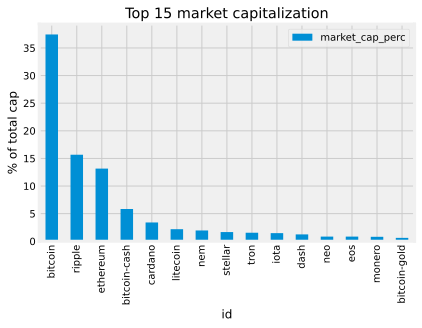

In [9]:
#by percent of market cap

#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 15 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap.head(15).set_index(cap.id[:15])

# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc =
                    lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()) * 100)

# Plotting the barplot with the title defined above 
ax = cap10.plot.bar(x = 'id', y = 'market_cap_perc', title = TOP_CAP_TITLE)

# Annotating the y axis with the label defined above
# ... YOUR CODE FOR TASK 4 ...
ax.set_ylabel(TOP_CAP_YLABEL)

# 24 H change

In [10]:
#Percent change in 24 hours top 10

df1=data.sort_values("percent_change_24h",ascending=False).head(10)

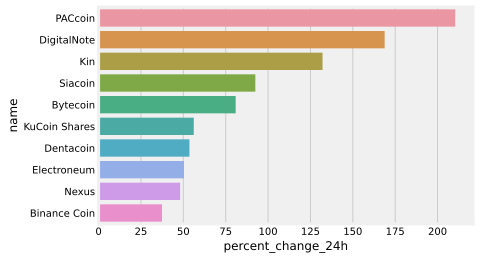

In [11]:
plt.figure(figsize=(6,4))

sns.barplot("percent_change_24h","name", data=df1)

# 7 D change

In [12]:
#7 days percent change top 10

df2=data.sort_values("percent_change_7d",ascending=False).head(10)

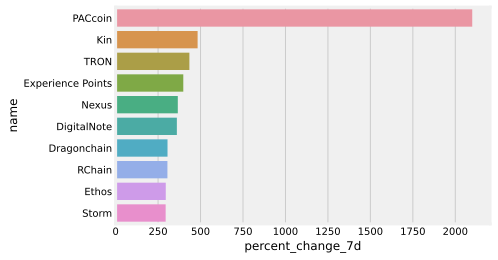

In [13]:
plt.figure(figsize=(6,4))

sns.barplot("percent_change_7d","name", data=df2)

# Price USD

In [14]:
#Price top 10

df3=data.sort_values("price_usd",ascending=False).head(10)

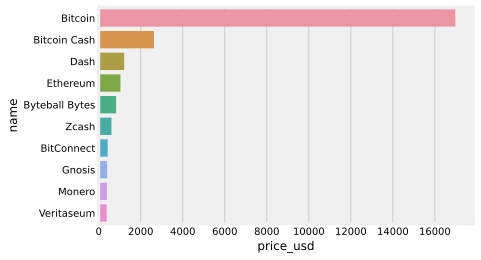

In [15]:
plt.figure(figsize=(6,4))

sns.barplot("price_usd","name", data=df3)

# Market Cap USD

In [16]:
#Market Cap in USD

df4=data.sort_values("market_cap_usd",ascending=False).head(10)

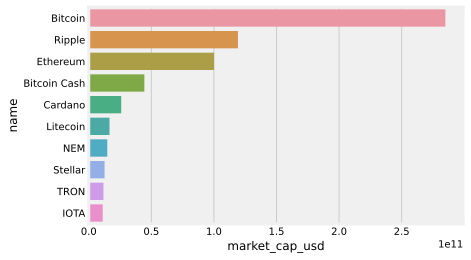

In [17]:
plt.figure(figsize=(6,4))

sns.barplot("market_cap_usd","name", data=df4)

# Percent Change 24 H

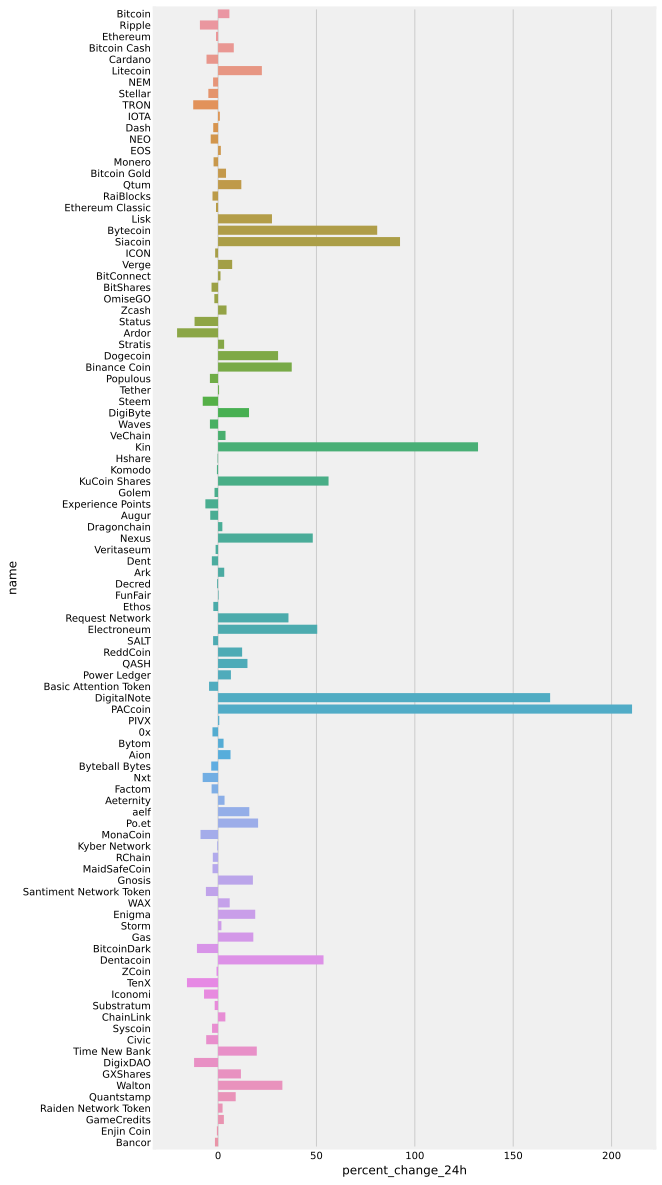

In [18]:
#24 Hour percent change

plt.figure(figsize=(8,21))

sns.barplot("percent_change_24h","name", data=data)

In [19]:
#Thank You